In [10]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [27]:
import random
train_folder = r"C:\Users\Lenovo\Downloads\dogs-vs-cat\train"
def load_dataset(train_folder, img_size=64, limit=2000):
    files = os.listdir(train_folder)
    random.shuffle(files)  # 🔀 Shuffle the file list to mix cats and dogs

    data = []
    labels = []

    count = 0
    for filename in tqdm(files):
        if filename.endswith(".jpg"):
            label = 0 if "cat" in filename else 1
            img_path = os.path.join(train_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                data.append(img.flatten())
                labels.append(label)
                count += 1
            if count >= limit:
                break

    return np.array(data), np.array(labels)

In [28]:
train_folder = r"C:\Users\Lenovo\Downloads\dogs-vs-cat\train"
X, y = load_dataset(train_folder, img_size=64, limit=2000)  # 1000 cats, 1000 dogs
print("Label distribution:", np.unique(y, return_counts=True))


  8%|██████▏                                                                      | 1999/25000 [00:36<07:03, 54.37it/s]


Label distribution: (array([0, 1]), array([ 978, 1022], dtype=int64))


In [33]:
X = X / 255.0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
print("Example filenames:", os.listdir(train_folder)[:10])


Example filenames: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']


In [35]:
print("Total images:", len(os.listdir(train_folder)))

Total images: 25000


In [36]:
train_folder = r"C:\Users\Lenovo\Downloads\dogs-vs-cat\train"
has_dog_images = any("dog" in f for f in os.listdir(train_folder))
print("Has dog images:", has_dog_images)

Has dog images: True


In [37]:
svm_model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
y_pred = svm_model.predict(X_val)

In [39]:
from sklearn.metrics import accuracy_score, classification_report


In [40]:
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred, target_names=["Cat", "Dog"]))

✅ Accuracy: 0.5675

📊 Classification Report:
               precision    recall  f1-score   support

         Cat       0.58      0.59      0.59       206
         Dog       0.56      0.54      0.55       194

    accuracy                           0.57       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.57      0.57      0.57       400



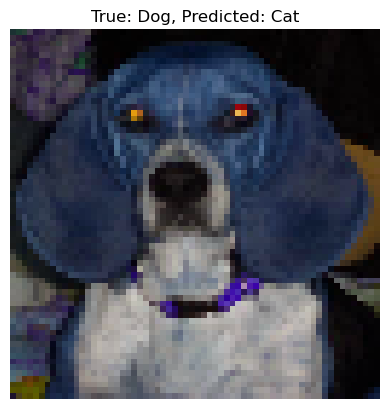

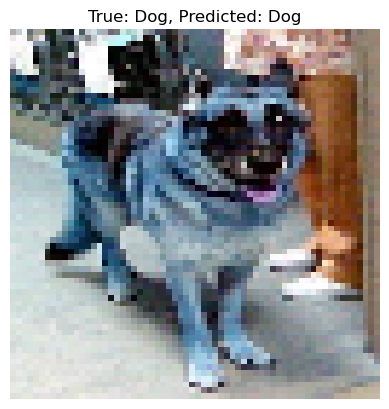

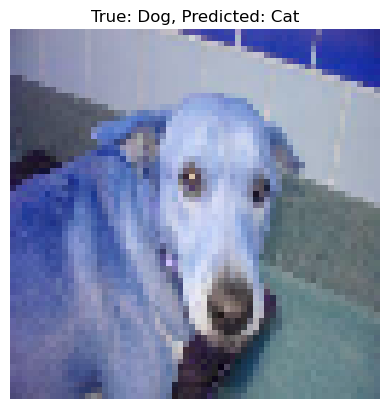

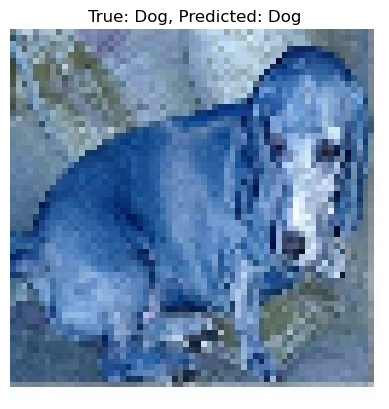

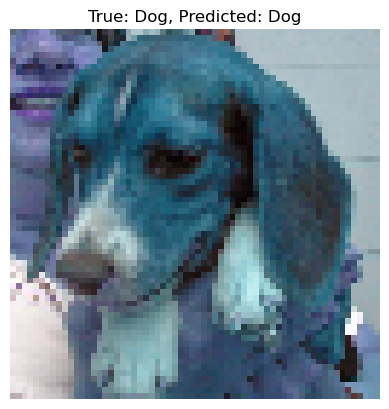

In [41]:
import matplotlib.pyplot as plt

# Show 5 random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_val))
    img = X_val[idx].reshape(64, 64, 3)
    true_label = "Cat" if y_val[idx] == 0 else "Dog"
    predicted_label = "Cat" if y_pred[idx] == 0 else "Dog"

    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
